# Bioinformatics

In [ ]:
pip install chembl_webresource_client

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-cp37-none-any.whl size=55663 sha256=c2705a83e2c1a1df5a65b9b68b85bb4f98cc00064a5be09d53328302bfc309a9
  Stored in directory: /root/.cache/pip/wheels/98/4c/16/bdb2ef9c937173e56b04d71fc1a6f98f0ff24992ae2e35daf3
Successfully built chembl-webresource-client


In [ ]:
# !wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
# !time conda install -q -y -c conda-forge rdkit


--2021-06-12 13:21:02--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2021-06-12 13:21:02--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   148MB/s    in 0.6s    

2021-06-12 13:21:03 (148 MB/s) - ‘Minicon

In [ ]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


In [ ]:
# %%bash
# add-apt-repository ppa:ubuntu-toolchain-r/test
# apt-get update --fix-missing
# apt-get dist-upgrade
# wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
# chmod +x Miniconda3-latest-Linux-x86_64.sh
# ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# conda config --set always_yes yes --set changeps1 no
# conda install -q -y -c conda-forge python=3.7
# conda install -q -y -c conda-forge rdkit

 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease


E: Could not get lock /var/lib/dpkg/lock-frontend - open (11: Resource temporarily unavailable)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), is another process using it?
--2021-06-12 13:27:26--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-06-12 13:27:26--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [appl

In [ ]:
# import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [ ]:
# !sudo apt-get install software-properties-common
# !sudo add-apt-repository ppa:ubuntu-toolchain-r/test
# !sudo apt-get update
# !sudo apt-get install gcc-4.9
# !sudo apt-get upgrade libstdc++6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.14).
You might want to run 'apt --fix-broken install' to correct these.
The following packages have unmet dependencies:
 libcudnn7-dev : Depends: libcudnn7 (= 7.6.5.32-1+cuda10.2) but 7.6.5.32-1+cuda10.1 is to be installed
E: Unmet dependencies. Try 'apt --fix-broken install' with no packages (or specify a solution).
 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/comp

In [ ]:
# !sudo apt --fix-broken install
# version 2018 is quite easy
# download & extract
url = 'https://anaconda.org/rdkit/rdkit/2018.09.1.0/download/linux-64/rdkit-2018.09.1.0-py36h71b666b_1.tar.bz2'
!curl -L $url | tar xj lib
# move to python packages directory
!mv lib/python3.6/site-packages/rdkit /usr/local/lib/python3.6/dist-packages/
x86 = '/usr/lib/x86_64-linux-gnu'
!mv lib/*.so.* $x86/
# rdkit need libboost_python3.so.1.65.1
!ln -s $x86/libboost_python3-py36.so.1.65.1 $x86/libboost_python3.so.1.65.1


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3833    0  3833    0     0  15904      0 --:--:-- --:--:-- --:--:-- 15904
100 20.2M  100 20.2M    0     0  5391k      0  0:00:03  0:00:03 --:--:-- 5875k


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [ ]:
! mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
pandas                   [] (00m:00s) 
openssl                  [] (00m:01s) Decompressing...
boost-cpp                [] (00m:01s) Waiting...
libuuid                  [] (00m:01s) Waiting...
libpng                   [] (00m:01s) Waiting...
libgfortran5             [] (00m:01s) Waiting...
openjpeg                 [] (00m:01s) Waiting...
pcre                     [] (00m:01s) Waiting...
pixman                   [] (00m:01s) Waiting...
python-dateutil          [] (00m:01s) Waiting...
libxcb                   [] (00m:01s) Waiting...
numpy                    [] (00m:00s) Waiting...
sqlalchemy               [] (00m:00s) Waiting...
xorg-libsm               [] (00m:00s) Waiting...
rdkit                    [] (00m:00s)     14 MB /     38 MB ( 11.15 MB/s)
typing_extensions        [] (00m:00s) Waiting...
xorg-libxext             [] (00m:00s) Waiting...
xorg-libxrender          [] (00m:00s) Waiting...
xorg-xproto              [] (00m:00s) Waiting.

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

In [ ]:
target = new_client.target
target_query = target.search("coronavirus")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
selected_target = targets.target_chembl_id[4] 
selected_target

'CHEMBL3927'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type = "IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,None,CHEMBL187579,5.14,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,None,IC50,nM,None,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,None,CHEMBL188487,5.03,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,None,IC50,nM,None,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,None,CHEMBL185698,4.87,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,None,IC50,nM,None,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,None,CHEMBL426082,4.88,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,None,IC50,nM,None,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,None,CHEMBL187717,5.70,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,None,None,CHEMBL2146458,Bioorg. Med. Chem.,2012,"{'bei': '14.70', 'le': '0.27', 'lle': '1.57', ...",CHEMBL2146517,METHYL TANSHINONATE,CHEMBL2146517,4.97,False,http://www.openphacts.org/units/Nanomolar,1727226,=,1,True,=,None,IC50,nM,None,10600.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_000

In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
df.to_csv("bioactivity_data.csv", index=False)

In [ ]:
#from google.colab import drive
#drive.mount('/CollabProject/', force_remount=True)

In [ ]:
! ls

bioactivity_data.csv  lib  Miniconda3-latest-Linux-x86_64.sh  sample_data


In [ ]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei': '5.90'}

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,None,CHEMBL187579,5.14,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,None,IC50,nM,None,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,None,CHEMBL188487,5.03,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,None,IC50,nM,None,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,None,CHEMBL185698,4.87,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,None,IC50,nM,None,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,None,CHEMBL426082,4.88,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,None,IC50,nM,None,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,None,CHEMBL187717,5.70,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,None,None,CHEMBL2146458,Bioorg. Med. Chem.,2012,"{'bei': '14.70', 'le': '0.27', 'lle': '1.57', ...",CHEMBL2146517,METHYL TANSHINONATE,CHEMBL2146517,4.97,False,http://www.openphacts.org/units/Nanomolar,1727226,=,1,True,=,None,IC50,nM,None,10600.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_000

In [ ]:
bioactivity_class = []
for i in df2.standard_value :
  if float(i) <= 1000 :
    bioactivity_class.append("active")
  elif float(i) >= 10000 :
    bioactivity_class.append("inactive")
  else :
    bioactivity_class.append("intermediate") 

In [ ]:
bioactivity_class

['intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'intermediate',
 'inactive',
 'inactive',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inact

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id :
  mol_cid.append(i)

In [ ]:
mol_cid

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

In [ ]:
selected_columns = ['molecule_chembl_id','canonical_smiles', 'standard_value']
df3 = df2[selected_columns]

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [ ]:
df4 = pd.concat([df3, pd.Series(bioactivity_class)], axis=1)

In [ ]:
df4.rename(columns={0 : 'bioactivity_class'}, inplace = True)
# df4.rename(columns={'TEST':'bioactivity_class'}, inplace = True)

In [ ]:
df4.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class'],
      dtype='object')

In [ ]:
df3.to_csv("bioactivity_preprocessed_data.csv", index=False)

In [ ]:
df3['canonical_smiles']

0                 Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21
1                 O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21
2                O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21
3                    O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21
4        O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]
                             ...                        
128    COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...
129          C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C
130               Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12
131        Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1
132               CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C
Name: canonical_smiles, Length: 133, dtype: object

In [ ]:
! ls -l

total 92128
-rw-r--r-- 1 root root    70334 Jun 20 14:41 bioactivity_data.csv
-rw-r--r-- 1 root root     9337 Jun 20 14:43 bioactivity_preprocessed_data.csv
drwxr-xr-x 4 root root    12288 Jun 20 14:31 lib
-rw-r--r-- 1 root root 94235922 Jun 20 14:30 Miniconda3-latest-Linux-x86_64.sh
drwxr-xr-x 1 root root     4096 Jun 15 13:37 sample_data


In [ ]:
def lipinski(smiles, verbose=False) :
  moldata = []
  for elem in smiles:
    mol = rdkit.Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0

  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Descriptors.NumHDonors(mol)
    desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)
    
    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])

    if (i == 0):
      baseData = row
    else :
      baseData = np.vstack([baseData, row])
    i = i + 1
    
  columnName = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data = baseData, columns = columnName)

  return descriptors

In [ ]:
df_lipinski = lipinski(df3.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [ ]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


In [ ]:
# df_combined = df_combined.convert_objects(convert_numeric=True)
df_combined['standard_value'] = df_combined['standard_value'].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
df_combined['bioactivity_class'] = df_combined['bioactivity_class'].astype(str)

In [ ]:
df_combined['bioactivity_class'] = df_combined['bioactivity_class'].str.replace('/',' ')

In [ ]:
df_combined.bioactivity_class.describe()

count          133
unique           3
top       inactive
freq           104
Name: bioactivity_class, dtype: object

In [ ]:
def pIC50(input):
  pIC50 = []

  for i in input['standard_value_norm']:
    molar = i*(10**-9)
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop('standard_value_norm',1)

  return x

In [ ]:
df_combined = df_combined.drop('pIC50',1)

In [ ]:
# df_combined.pIC50.describe()

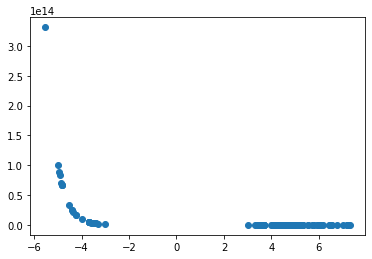

In [ ]:
# plt.scatter(df_combined.pIC50, df_combined.standard_value)

In [ ]:
-np.log10((10**-9)*10000000000) 

-1.0

In [ ]:
def norm_value(input):
  norm = []

  for i in input['standard_value']:
    if i > 1000000000:
      i = 1000000000
    norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop('standard_value',1)

  return x

In [ ]:
df_norm = norm_value(df_combined)

In [ ]:
df_norm.standard_value_norm.describe()

count    1.330000e+02
mean     2.105753e+08
std      4.091984e+08
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+09
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [ ]:
df_final.pIC50.describe()

count    133.000000
mean       3.849622
std        2.155810
min       -0.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616
